# Bayesian Statistics

In [ ]:
!pip install pgmpy networkx matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

https://pgmpy.org/models/bayesiannetwork.html

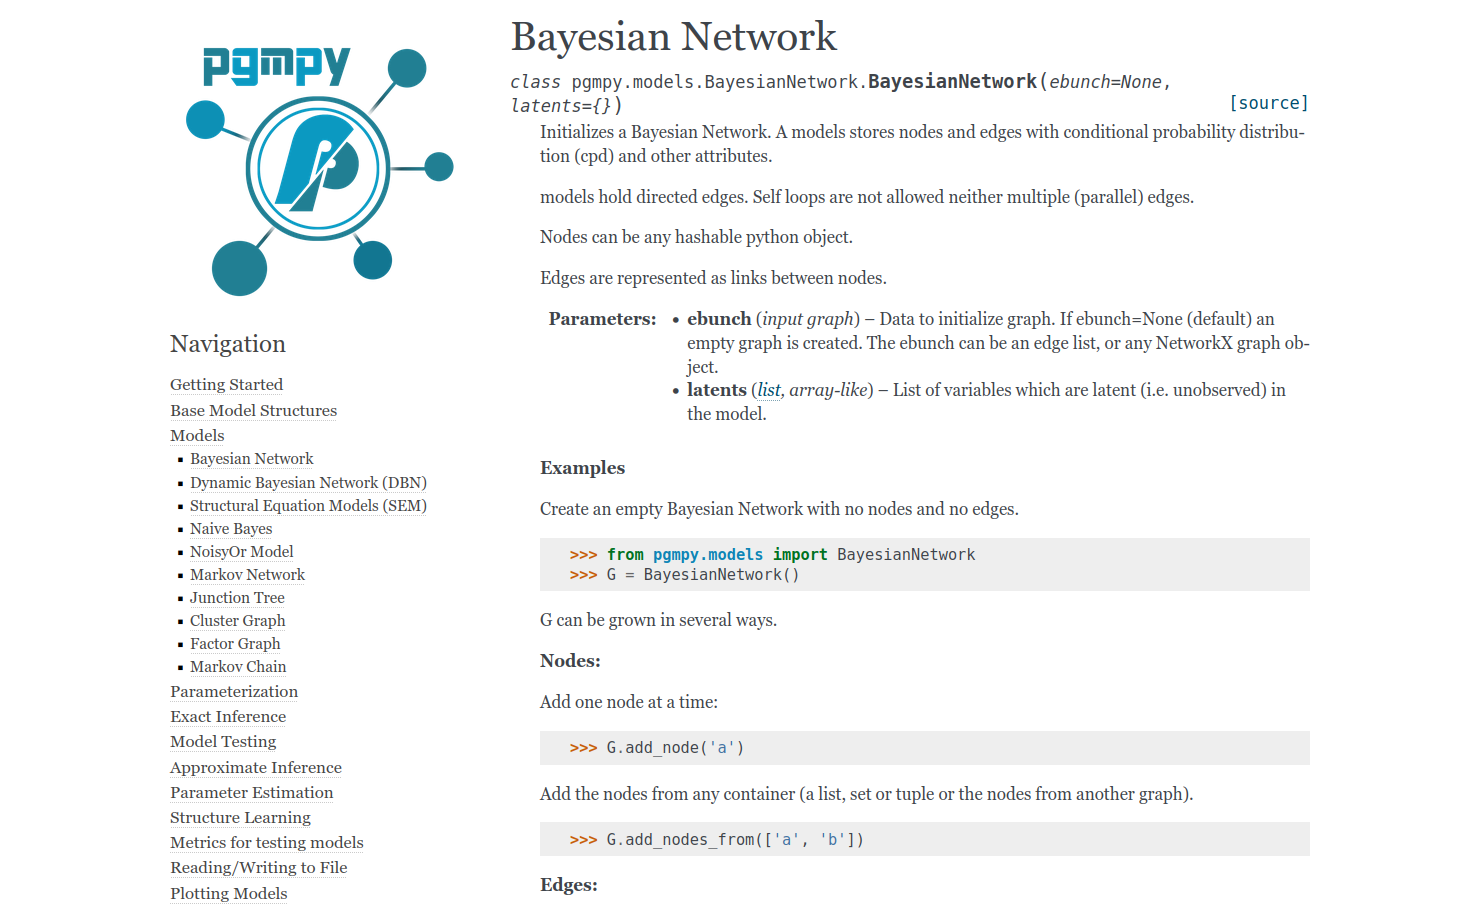

# With Libraries

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Definir la estructura de la red bayesiana
model = BayesianNetwork([('Robo', 'Alarma'),
                         ('Terremoto', 'Alarma'),
                         ('Alarma', 'JohnLlama'),
                         ('Alarma', 'MaryLlama')])

# Definir las probabilidades condicionales
cpd_robo = TabularCPD(variable='Robo', variable_card=2, values=[[0.999], [0.001]], state_names={'Robo': [False, True]})

cpd_terremoto = TabularCPD(variable='Terremoto', variable_card=2, values=[[0.998], [0.002]], state_names={'Terremoto': [False, True]})

cpd_alarma = TabularCPD(variable='Alarma', variable_card=2,
                        values=[[0.999, 0.71, 0.06, 0.05],
                                [0.001, 0.29, 0.94, 0.95]],
                        evidence=['Robo', 'Terremoto'],
                        evidence_card=[2, 2],
                        state_names={
                                'Alarma': [False, True],
                                'Robo': [False, True],
                                'Terremoto': [False, True]
                        })

cpd_john_llama = TabularCPD(variable='JohnLlama', variable_card=2,
                            values=[[0.95, 0.10],
                                    [0.05, 0.90]],
                            evidence=['Alarma'],
                            evidence_card=[2],
                            state_names={
                                'JohnLlama': [False, True],
                                'Alarma': [False, True]
                        })

cpd_mary_llama = TabularCPD(variable='MaryLlama', variable_card=2,
                            values=[[0.95, 0.10],
                                    [0.05, 0.90]],
                            evidence=['Alarma'],
                            evidence_card=[2],
                            state_names={
                                'MaryLlama': [False, True],
                                'Alarma': [False, True]
                        })

# Añadir las CPDs al modelo
model.add_cpds(cpd_robo, cpd_terremoto, cpd_alarma, cpd_john_llama, cpd_mary_llama)

# Comprobar que el modelo es válido
assert model.check_model()

# Realizar inferencia usando Variable Elimination
inferencia = VariableElimination(model)

# Calcular P(Robo|JohnLlama=true, MaryLlama=true )
query_result = inferencia.query(variables=['Robo'], evidence={'JohnLlama': True, 'MaryLlama': True})
print(query_result)


+-------------+-------------+
| Robo        |   phi(Robo) |
+=============+=============+
| Robo(False) |      0.8320 |
+-------------+-------------+
| Robo(True)  |      0.1680 |
+-------------+-------------+


In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

# Definir la estructura de la red bayesiana
model = BayesianNetwork([('Nublado', 'Aspersor'),
                         ('Nublado', 'Lluvia'),
                         ('Aspersor', 'HierbaMojada'),
                         ('Lluvia', 'HierbaMojada')])

# Definir las probabilidades condicionales
cpd_Nublado = TabularCPD(variable='Nublado', variable_card=2, values=[[0.5], [0.5]], state_names={'Nublado': [False, True]})

cpd_Aspersor = TabularCPD(variable='Aspersor', variable_card=2,
                            values=[[0.50, 0.90],
                                    [0.50, 0.10]],
                            evidence=['Nublado'],
                            evidence_card=[2],
                            state_names={
                                'Aspersor': [False, True],
                                'Nublado': [False, True]
                        })
cpd_Lluvia = TabularCPD(variable='Lluvia', variable_card=2,
                            values=[[0.80, 0.20],
                                    [0.20, 0.80]],
                            evidence=['Nublado'],
                            evidence_card=[2],
                            state_names={
                                'Lluvia': [False, True],
                                'Nublado': [False, True]
                        })

cpd_HierbaMojada = TabularCPD(variable='HierbaMojada', variable_card=2,
                        values=[[1.0, 0.10, 0.10, 0.01],
                                [0.0, 0.90, 0.90, 0.99]],
                        evidence=['Aspersor', 'Lluvia'],
                        evidence_card=[2, 2],
                        state_names={
                                'HierbaMojada': [False, True],
                                'Aspersor': [False, True],
                                'Lluvia': [False, True]
                        })

# Añadir las CPDs al modelo
model.add_cpds(cpd_Nublado,
               cpd_Aspersor, cpd_Lluvia,
               cpd_HierbaMojada)

# Comprobar que el modelo es válido
assert model.check_model()

# Realizar inferencia usando Variable Elimination
inferencia = VariableElimination(model)

# Calcular P(Robo|JohnLlama=true, MaryLlama=true )
query_result = inferencia.query(variables=['Lluvia'],
                                evidence={'HierbaMojada': True})
print(query_result)

+---------------+---------------+
| Lluvia        |   phi(Lluvia) |
+===============+===============+
| Lluvia(False) |        0.2921 |
+---------------+---------------+
| Lluvia(True)  |        0.7079 |
+---------------+---------------+


# From scratch

In [ ]:
# Probabilidades marginales
pB = {True: 0.001, False: 0.999}
pE = {True: 0.002, False: 0.998}

# Probabilidades condicionales para A dada B, E
# Formato: pA[(b, e)] = P(A=1 | B=b, E=e)
pA = {
    (True, True): 0.95,
    (True, False): 0.94,
    (False, True): 0.29,
    (False, False): 0.001
}
# Para obtener P(A=0 | B=b, E=e), hacemos 1 - pA[(b,e)]

# Probabilidades condicionales de J y M dado A
# pJ[a] = P(J=1 | A=a)
pJ = {
    True: 0.90,
    False: 0.05
}
# pM[a] = P(M=1 | A=a)
pM = {
    True: 0.90,
    False: 0.05
}


In [ ]:
def P_b(b: bool) -> float:
    return pB[b]

def P_e(e: bool) -> float:
    return pE[e]

def P_a_given_be(a: bool, b: bool, e: bool) -> float:
    if a:
        return pA[(b, e)]
    else:
        return 1.0 - pA[(b, e)]

def P_j_given_a(j: bool, a: bool) -> float:
    # P(J=j | A=a)
    if j:
        return pJ[a]
    else:
        return 1.0 - pJ[a]

def P_m_given_a(m: bool, a: bool) -> float:
    # P(M=m | A=a)
    if m:
        return pM[a]
    else:
        return 1.0 - pM[a]

def joint_probability(b: bool, e: bool, a: bool, j: bool, m: bool) -> float:
       return (
        P_b(b) *
        P_e(e) *
        P_a_given_be(a, b, e) *
        P_j_given_a(j, a) *
        P_m_given_a(m, a)
    )


In [ ]:
def P_b_given_jm() -> float:
    # Primero calculamos P(j=1, m=1) = sum_{b,a,e} P(b,a,e,j=1,m=1)
    p_jm = 0.0
    for b_val in [False, True]:
        for e_val in [False, True]:
            for a_val in [False, True]:
                p_jm += joint_probability(b_val, e_val, a_val, True, True)

    # Luego P(b=True, j=1, m=1) = sum_{a,e} P(b=True,a,e,j=1,m=1)
    p_b_jm = 0.0
    for e_val in [False, True]:
        for a_val in [False, True]:
            p_b_jm += joint_probability(True, e_val, a_val, True, True)

    return p_b_jm / p_jm

# Ejecutar y ver resultado
p_b_given_jm_val = P_b_given_jm()
print(f"P(B=True | J=True, M=True) = {p_b_given_jm_val:.8f}")


P(B=True | J=True, M=True) = 0.16804096
